The objective of our assignment is to build a word cloud by parsing WikiPedia pages and create an image with the least amount of noise

We'll get our data by using request library after setting up a URL

In [1]:
url="https://en.wikipedia.org/wiki/Philosophy_of_Friedrich_Nietzsche"

In [2]:
import requests

text= requests.get(url).content.decode('utf-8')

In [3]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script= False
    result= ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script", "style"]:
            self.script=True

    def handle_endtag(self, tag):
        if tag.lower() in ["script", "style"]:
            self.script=False

    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.result += " " + data.replace('[ edit ]', '')

parser = MyHTMLParser()
parser.feed(text)
text=parser.result
text[:1000]

' Philosophy of Friedrich Nietzsche - Wikipedia Jump to content Main menu Main menu move to sidebar hide \n\t\tNavigation\n\t Main page Contents Current events Random article About Wikipedia Contact us Donate \n\t\tContribute\n\t Help Learn to edit Community portal Recent changes Upload file Languages Language links are at the top of the page. Search Search Create account Log in Personal tools Create account Log in \n\t\tPages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Nihilism and God is dead 2 Master morality and slave morality 3 The  Wille zur Macht  and the thought of eternal recurrence Toggle The  Wille zur Macht  and the thought of eternal recurrence subsection 3.1 The will to power 3.2 Übermensch 3.3 Amor fati  and the eternal recurrence 4 Social and political views Toggle Social and political views subsection 4.1 Individualism and liberalism 4.2 Criticism of socialism and labour movement 4.3 Race, class and eugenics 4.4 Jews, nat

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from rake_nltk import Rake

rake=Rake()
rake.extract_keywords_from_text(text)
kw=rake.get_ranked_phrases()
kw

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['friedrich nietzsche 5 languages العربية فارسی français português 中文 edit links article talk english read edit view history tools tools move',
 'der als scharnierstelle zwischen den metaphyisischen willensbegriffen schopenhauers und nietzsches fungierte',
 'dead holy lie immaculate perception last man master – slave morality perspectivism ressentiment transvaluation',
 'conduct developers statistics cookie statement mobile view toggle limited content width',
 'related changes upload file special pages permanent link page information cite',
 'edit community portal recent changes upload file languages language links',
 'sidebar hide navigation main page contents current events random article',
 'søren kierkegaard 8 legacy 9 see also 10 notes 11 references 12',
 'über eine philosophische flaschenpost und ihren absender',
 'page get shortened url wikidata item print',
 'sidebar hide actions read edit view history general',
 'wikipedia contact us donate contribute help learn',
 'content ma

In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


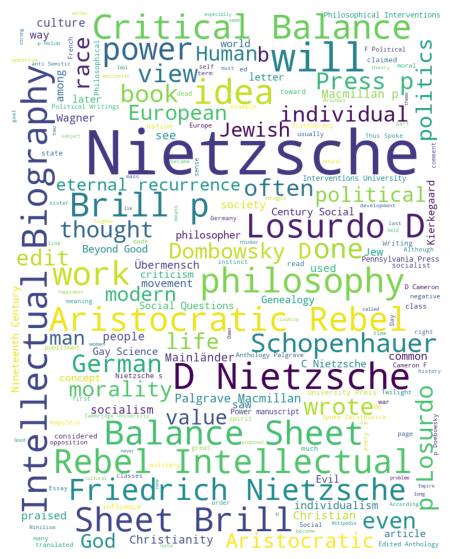

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=800, height=1000, background_color='white')
plt.figure(figsize=(15, 7))  
plt.imshow(wc.generate(text))
plt.axis("off")  
plt.show()